ASSESSMENT FOR WEEK 1 -- KEY

NOTE TO LEARNER -- we’ll leave all the players in for these analyses -- we will not drop any players from the analyses

## Step 1

In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime

# Read in the dataset

df = pd.read_csv("../Data/TexasTechVBall.csv")
df.head()

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %
0,8/19/19,PRAC,8/19/19,Erika,S,1595,2750,2.9,9.6,15.6,...,116,8,0,17.7,14.0,62,22.5,0,0,0
1,8-19-19#2,PRAC,8/19/19,Erika,S,1020,2750,1.9,8.4,14.6,...,62,2,1,21.7,13.4,60,22.5,0,0,0
2,8/19/19,PRAC,8/19/19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,194,126,8,22.2,18.8,75,25.0,3,2,5
3,8-19-19#2,PRAC,8/19/19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,53,41,2,20.4,17.9,72,25.0,4,0,4
4,8/19/19,PRAC,8/19/19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,121,113,91,28.9,26.5,88,30.0,7,2,9


## Step 2

In [2]:
# we'll make a copy of the dataframe before we get started changing it
df_vbp=df

df_vbp.loc[:,'DATE'] = pd.to_datetime(df_vbp['DATE'], errors='coerce')
df_vbp.loc[:,'WEEK'] = (df_vbp['DATE'].dt.week) - 33

df_vbp.head()

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %,WEEK
0,8/19/19,PRAC,2019-08-19,Erika,S,1595,2750,2.9,9.6,15.6,...,8,0,17.7,14.0,62,22.5,0,0,0,1
1,8-19-19#2,PRAC,2019-08-19,Erika,S,1020,2750,1.9,8.4,14.6,...,2,1,21.7,13.4,60,22.5,0,0,0,1
2,8/19/19,PRAC,2019-08-19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,126,8,22.2,18.8,75,25.0,3,2,5,1
3,8-19-19#2,PRAC,2019-08-19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,41,2,20.4,17.9,72,25.0,4,0,4,1
4,8/19/19,PRAC,2019-08-19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,113,91,28.9,26.5,88,30.0,7,2,9,1


## Step 3

In [3]:
jumps = df_vbp.groupby(['EVENT TYPE','POSITION'])[['JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)']].mean()
print(jumps)

                          JUMPS   JUMPS 15+  JUMPS 20+  HIGHEST JUMP (in)
EVENT TYPE POSITION                                                      
GAME       MB         77.652174   64.391304  24.434783          25.591304
           OH         48.905660   39.981132  23.962264          26.794340
           S          96.583333   23.458333   0.791667          19.112500
PRAC       MB        132.010000   97.520000  22.450000          24.363000
           OH         81.157407   66.995370  32.972222          25.838605
           S         106.728814   23.991525   0.813559          19.203390
SCRIMMAGE  MB        159.333333  132.000000  35.666667          24.600000
           OH         90.000000   80.428571  53.142857          27.828571
           S         138.750000   37.250000   3.000000          20.225000


## Step 4

In [4]:
alert_landings = df_vbp.groupby(['EVENT TYPE','POSITION'])[['HIGH LANDING %','ALERT LANDING %', 'ELEVATED LANDING %']].mean()

print(alert_landings)

                     HIGH LANDING %  ALERT LANDING %  ELEVATED LANDING %
EVENT TYPE POSITION                                                     
GAME       MB              5.608696         2.304348            7.739130
           OH             10.226415         2.622642           12.867925
           S               2.833333         1.791667            4.541667
PRAC       MB              3.420000         0.860000            4.330000
           OH              5.361111         1.504630            6.870370
           S               0.991525         0.271186            1.245763
SCRIMMAGE  MB              2.666667         0.333333            3.000000
           OH              6.285714         4.000000           10.428571
           S               3.500000         0.250000            3.750000


## Step 5

Text(0, 0.5, 'Alert Landing %')

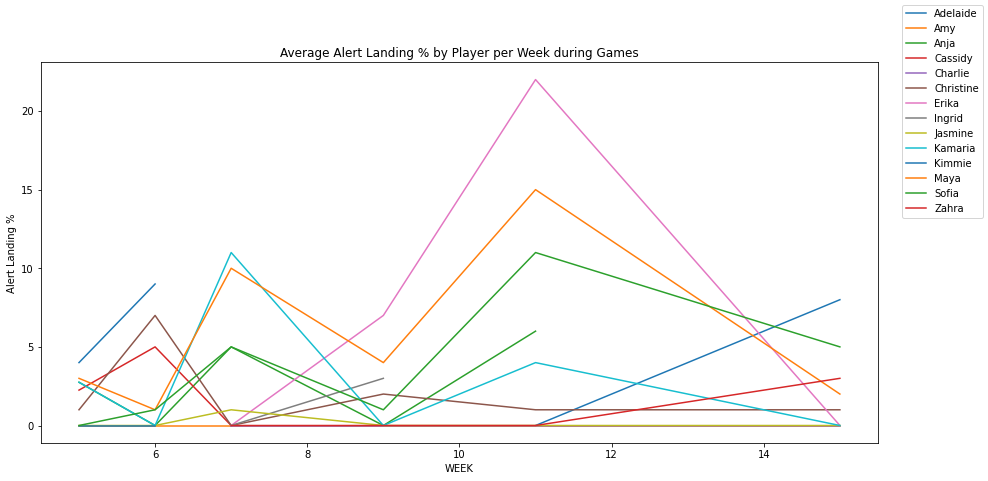

In [5]:
df_game = df_vbp.loc[df_vbp['EVENT TYPE'] == 'GAME']

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_game.groupby(['WEEK', 'PLAYER NAME']).mean()['ALERT LANDING %'].unstack().plot(ax=ax, legend=False)

fig.legend(loc="upper right")
plt.title("Average Alert Landing % by Player per Week during Games")
plt.ylabel("Alert Landing %")

## Step 6

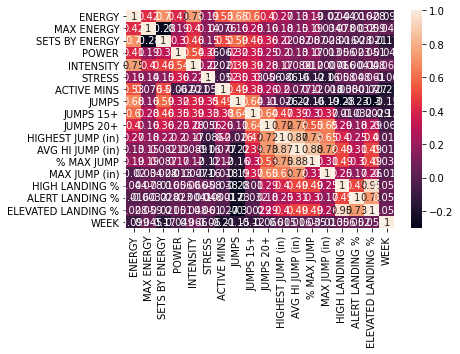

In [6]:
corrMatrix = df_vbp.corr()
sn.heatmap(corrMatrix, annot=True)

#this adjusts the size of the figure for better visualization
plt.rcParams["figure.figsize"] = (25,15)
plt.show()

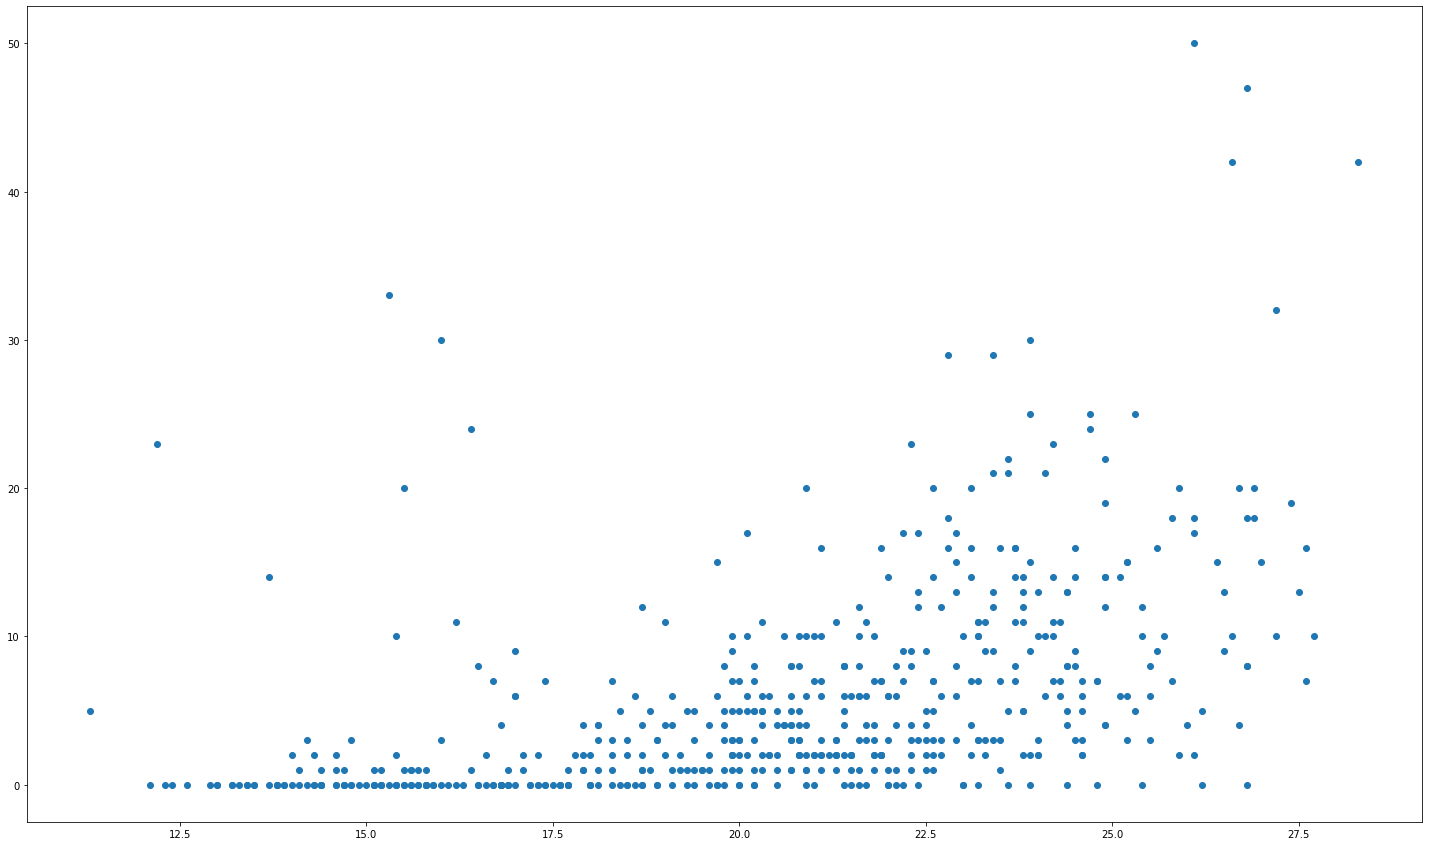

In [7]:
plt.scatter(df_vbp['AVG HI JUMP (in)'], df_vbp['ELEVATED LANDING %'])
plt.show()

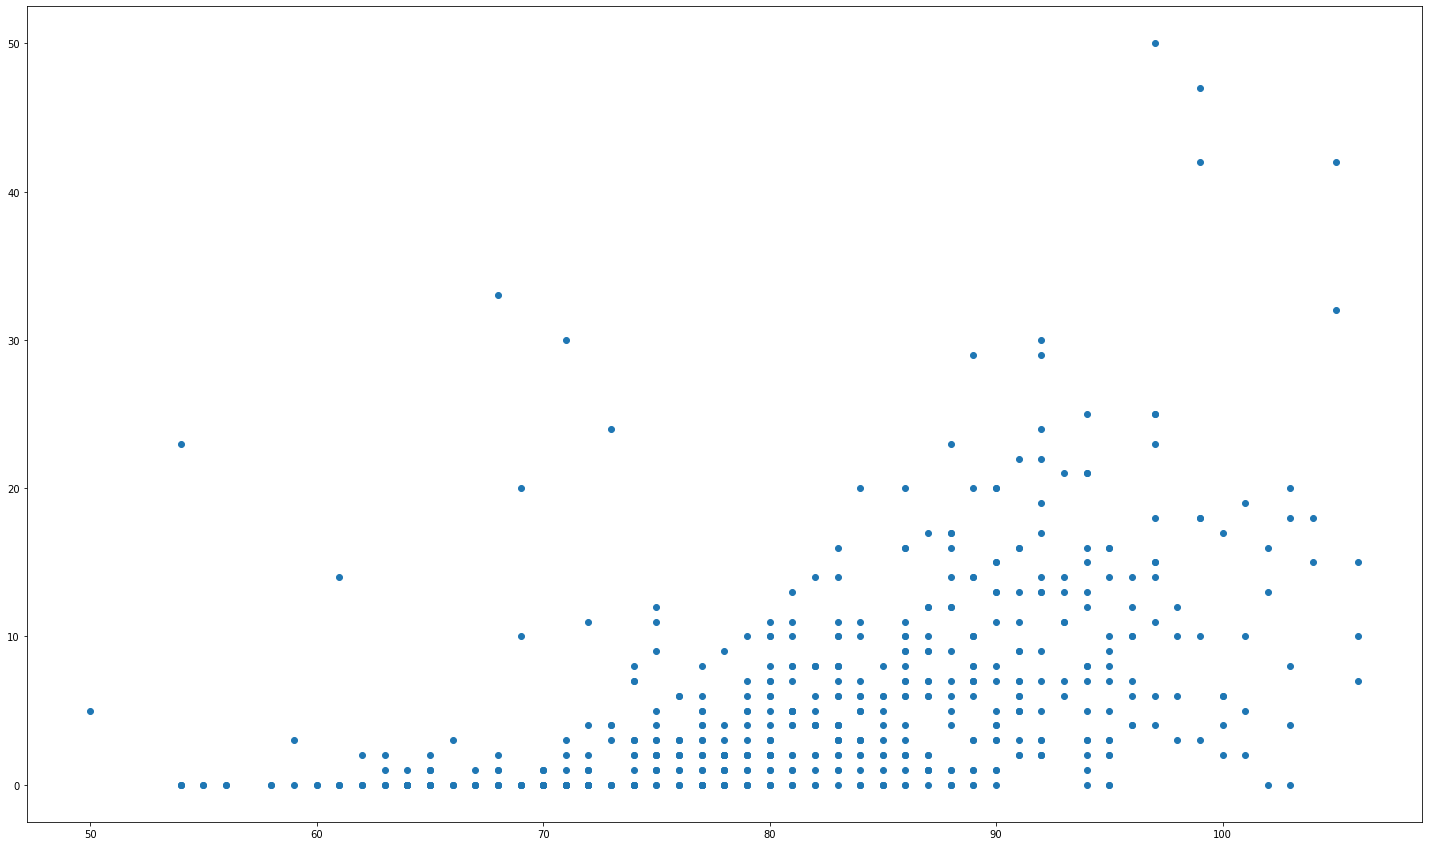

In [8]:
plt.scatter(df_vbp['% MAX JUMP'], df_vbp['ELEVATED LANDING %'])
plt.show()